In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 

%matplotlib inline
import numpy as np

(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()
print(len(x_train),len(x_test)) 

11490434/11490434 [==============================] - 1s 0us/step
60000 10000


In [3]:
x_test[0].shape
x_test=x_test/255
x_train=x_train/255

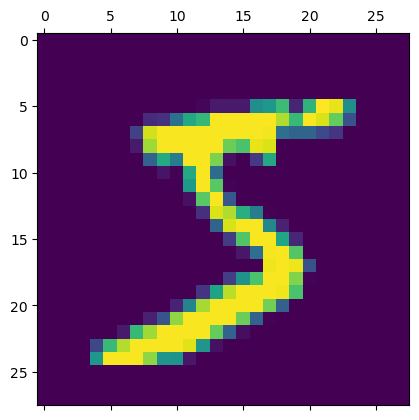

In [4]:
plt.matshow(x_train[0])

In [5]:
x_train_new=x_train.reshape(len(x_train),28*28)
x_test_new=x_test.reshape(len(x_test),28*28)
x_train_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_new,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4685 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3044 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2836 - accuracy: 0.9199
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2734 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2668 - accuracy: 0.9256


In [7]:
model.evaluate(x_test_new,y_test)

313/313 [==============================] - 0s 977us/step - loss: 0.2672 - accuracy: 0.9259


[0.26719847321510315, 0.9258999824523926]

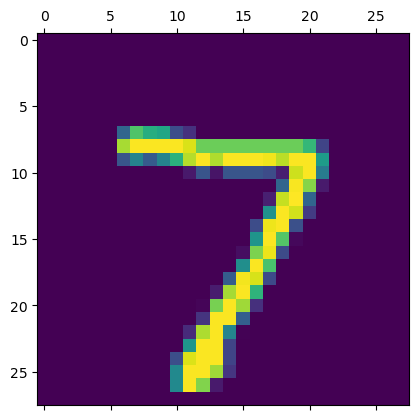

In [8]:
plt.matshow(x_test[0])

In [9]:
arr=model.predict(x_test_new)
arr[0]

313/313 [==============================] - 0s 788us/step


array([2.15113480e-02, 4.01577751e-07, 3.71381417e-02, 9.61569250e-01,
       3.86364455e-03, 1.02122895e-01, 1.21627249e-06, 9.99846160e-01,
       7.72847831e-02, 6.10678434e-01], dtype=float32)

In [10]:
np.argmax(arr[0])

7

In [11]:
arr_pr=[np.argmax(i) for i in arr]
arr_pr[:5]

[7, 2, 1, 0, 4]

In [12]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [13]:
from sklearn.metrics import confusion_matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=arr_pr)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    1,    0,    5,    6,    3,    2,    0],
       [   0, 1108,    4,    2,    0,    1,    4,    2,   14,    0],
       [   7,    7,  926,   14,    9,    3,   10,   15,   39,    2],
       [   3,    0,   20,  922,    0,   24,    2,   13,   20,    6],
       [   2,    1,    4,    1,  926,    0,    9,    5,   10,   24],
       [   8,    2,    3,   38,   10,  773,   12,    7,   32,    7],
       [  11,    3,    9,    1,    8,   14,  907,    2,    3,    0],
       [   1,    5,   21,    4,    8,    0,    0,  969,    3,   17],
       [   5,    7,    6,   22,    9,   22,    8,   15,  875,    5],
       [  11,    7,    1,    9,   41,    6,    0,   35,    7,  892]],
      dtype=int32)>

In [14]:
import seaborn as sn

Text(95.72222222222221, 0.5, 'True')

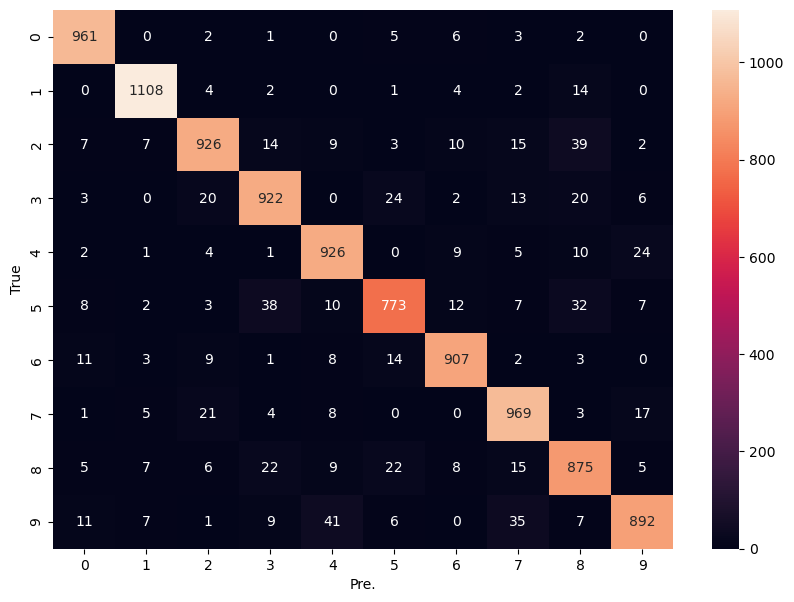

In [15]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Pre.')
plt.ylabel('True')

In [16]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_new,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2739 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1240 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0877 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0670 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0517 - accuracy: 0.9838


In [17]:
model.evaluate(x_test_new,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0972 - accuracy: 0.9703


[0.09716685861349106, 0.970300018787384]

In [18]:
arr=model.predict(x_test_new)
arr[0]

313/313 [==============================] - 0s 1ms/step


array([3.3822206e-03, 6.7508838e-04, 1.2386427e-01, 9.0340626e-01,
       9.3306180e-06, 3.3188234e-03, 2.6102629e-09, 9.9999648e-01,
       1.2364472e-02, 2.6375458e-01], dtype=float32)

In [19]:
arr_pr=[np.argmax(i) for i in arr]
arr_pr[:5]

[7, 2, 1, 0, 4]

In [20]:
from sklearn.metrics import confusion_matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=arr_pr)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    2,    1,    2,    0,    2,    1,    3],
       [   0, 1123,    1,    3,    1,    1,    2,    0,    3,    1],
       [   8,    5,  967,   15,    7,    0,    3,   19,    7,    1],
       [   0,    0,    0,  994,    1,    0,    0,    6,    1,    8],
       [   3,    0,    1,    1,  968,    0,    2,    1,    1,    5],
       [   2,    0,    0,   21,    1,  851,    4,    2,    4,    7],
       [   5,    3,    1,    2,    7,    3,  936,    0,    1,    0],
       [   0,    5,    5,    2,    5,    0,    0,  997,    0,   14],
       [   2,    2,    3,   12,    8,   10,    2,    5,  915,   15],
       [   4,    1,    0,    4,    8,    2,    0,    6,    0,  984]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'True')

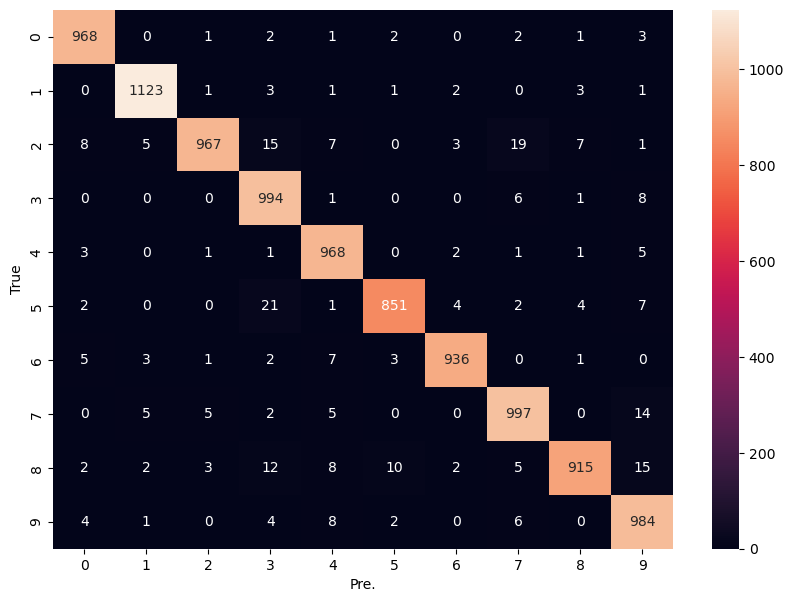

In [21]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Pre.')
plt.ylabel('True')

In [22]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu6'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2798 - accuracy: 0.9193
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1295 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0916 - accuracy: 0.9729
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0683 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0551 - accuracy: 0.9837


In [23]:
#Loss or Cost Function

In [24]:
import numpy as np

In [25]:
y_p=np.array([1,1,0,0,1])
y_true=np.array([0.30,0.7,1,0,0.5])

In [26]:
def mean_error(y_p,y_true):
    totel_e=0
    for i,j in zip(y_true,y_p):
        totel_e+=abs(i-j)
    return totel_e/len(y_true)
mean_error(y_p,y_true)

0.5

In [27]:
def mean_error(y_p,y_true):
    totel_e=0
    for i,j in zip(y_true,y_p):
        x=abs(i-j)
        totel_e+=x*x
    return totel_e/len(y_true)
mean_error(y_p,y_true)

0.366

In [28]:
y_p=np.array([1,1,0,0,1])
y_true=np.array([0.30,0.7,1,0,0.5])
np.mean(np.square(np.abs(y_p - y_true)))

0.366

In [29]:
y_p=np.array([1,1,0,0,1])
y_true=np.array([0.30,0.7,1,0,0.5])
epli=1e-15
y_p=[max(i,epli) for i in y_p]
y_p=[min(i,1-epli) for i in y_p]
y_p=np.array(y_p)
print(y_p)
def mean_error(y_p,y_true):
    totel_e=0
    for i,j in zip(y_true,y_p):
        x=i*np.log(j)+(1-i)*np.log(1-j)
        totel_e+=x
    return -totel_e/len(y_true)
mean_error(y_p,y_true)

[1.e+00 1.e+00 1.e-15 1.e-15 1.e+00]


17.2696280766844

In [30]:
-np.mean(y_true*np.log(y_p)+(1-y_true)*np.log(1-y_p))

17.2696280766844